In [1]:
import pandas as pd

In [3]:
teams=pd.read_csv("teams.csv")

In [4]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [41]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [15]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [17]:
teams.corr(numeric_only=True)["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [19]:
import seaborn as sns

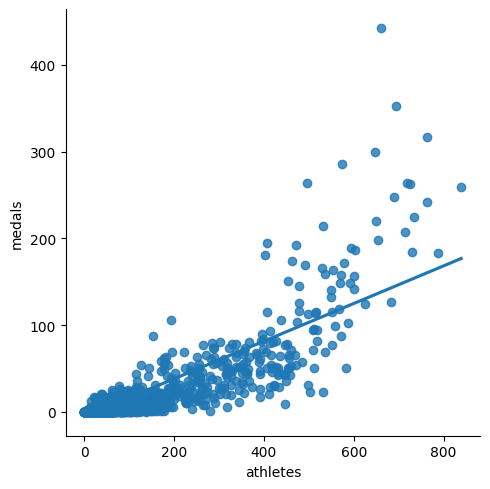

In [23]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

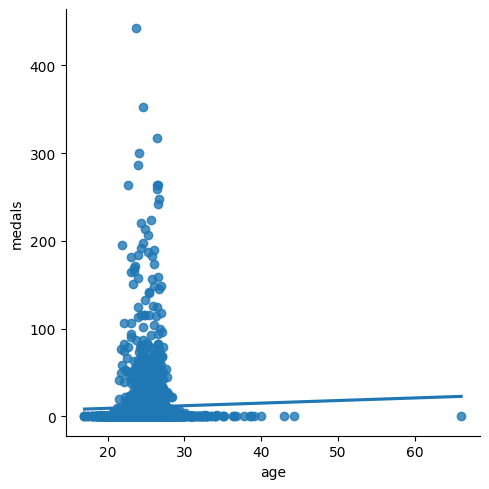

In [24]:
sns.lmplot(x="age", y="medals", data=teams, fit_reg=True, ci=None)

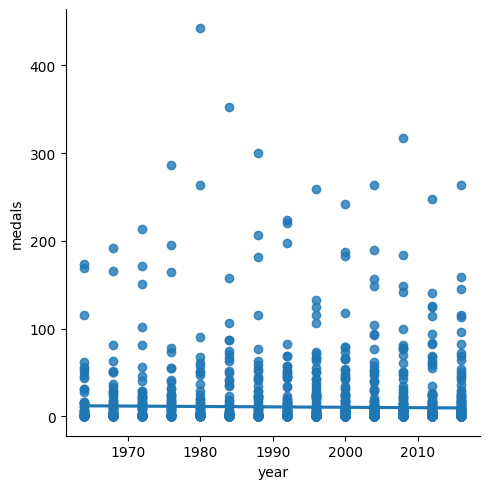

In [25]:
sns.lmplot(x="year", y="medals", data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

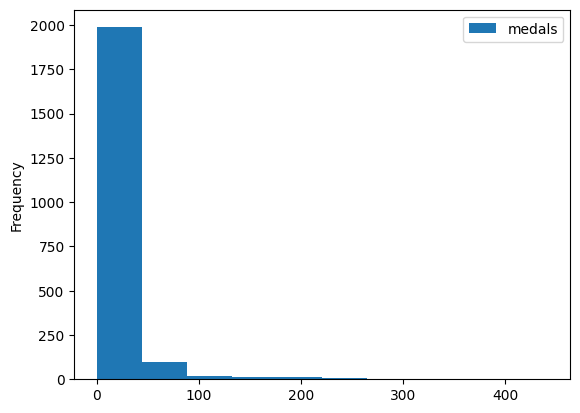

In [26]:
teams.plot.hist(y="medals")

In [27]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [28]:
teams['prev_medals'] = teams['prev_medals'].fillna(0)


In [29]:
teams['prev_medals'].isnull().sum()


0

In [30]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals


In [31]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [33]:
train= teams[teams["year"] < 2012].copy()
test= teams[teams["year"] >= 2012].copy()

In [34]:
test

,team,country,year,athletes,age,prev_medals,medals
6,AFG,Afghanistan,2012,6,24.8,1.0,1
7,AFG,Afghanistan,2016,3,24.7,1.0,0
24,ALB,Albania,2012,10,25.7,0.0,0
25,ALB,Albania,2016,6,23.7,0.0,0
37,ALG,Algeria,2012,39,24.8,2.0,1
...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0
2131,ZAM,Zambia,2012,7,22.6,0.0,0
2132,ZAM,Zambia,2016,7,24.1,0.0,0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [35]:
train.shape

(1736, 7)

In [56]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [57]:
predictors = ["athletes", "prev_medals"]

In [58]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [59]:
predictions = reg.predict(test[predictors])

In [60]:
predictions.shape

(408,)

In [62]:
test["predictions"]=predictions

In [63]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-1.134721
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.383299
24,ALB,Albania,2012,10,25.7,0.0,0,-1.514829
25,ALB,Albania,2016,6,23.7,0.0,0,-1.846266
37,ALG,Algeria,2012,39,24.8,2.0,1,2.311186
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-2.094845
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.763407
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.763407
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.248495


In [70]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [68]:
test["predictions"]= test["predictions"].round()

In [75]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"], test["predictions"])

In [76]:
error

3.343137254901961

In [77]:
teams.describe()["medals"]

count    2144.000000
mean       10.556437
std        33.028143
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       442.000000
Name: medals, dtype: float64

In [80]:
test[test["team"]== "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,280.0
2054,USA,United States,2016,719,26.4,248.0,264,234.0


In [81]:
test[test["team"]== "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,8.0
908,IND,India,2016,130,26.1,6.0,2,13.0


In [82]:
errors = (test["medals"] - test["predictions"]).abs()

In [83]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    1.0
2143    0.0
Length: 408, dtype: float64

In [84]:
team_err = errors.groupby(test["team"]).mean()

In [85]:
team_err

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.5
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.5
Length: 207, dtype: float64

In [86]:
team_medals = test["medals"].groupby(test["team"]).mean()

In [87]:
err_ratio = team_err/team_medals

In [88]:
err_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    inf
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 207, dtype: float64

In [90]:
 err_ratio[~pd.isnull(err_ratio)]

team
AFG    1.000000
ALG    1.000000
ANG         inf
ARG    0.853659
ARM    0.285714
         ...   
USA    0.121094
UZB    0.687500
VEN    2.000000
VIE    1.000000
ZIM         inf
Length: 104, dtype: float64

In [92]:
import numpy as np
err_ratio = err_ratio[np.isfinite(err_ratio)]

In [93]:
err_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.285714
AUS    0.367347
         ...   
UKR    1.048780
USA    0.121094
UZB    0.687500
VEN    2.000000
VIE    1.000000
Length: 98, dtype: float64

<Axes: ylabel='Frequency'>

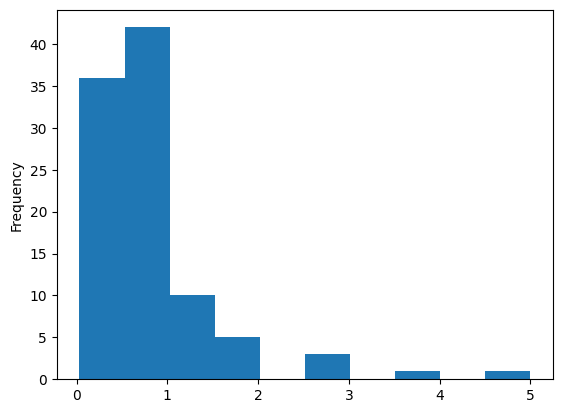

In [94]:
err_ratio.plot.hist()